# This is a simple digit recognition model using the MNIST dataset.
#### while ANN requires expensive setup, this model uses Logistic Regression, which consumes less computational power but predicts 92.30% accurate results!

### Imports and loading the data

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [101]:
train_data = pd.read_csv('/home/kandarpa-sarkar/Desktop/MNIST_proj/data/train_test/mnist_train.csv')
test_data = pd.read_csv('/home/kandarpa-sarkar/Desktop/MNIST_proj/data/train_test/mnist_test.csv')

In [102]:
print(train_data.shape,test_data.shape)

(60000, 785) (10000, 785)


In [103]:
train_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
X_train = train_data.drop(train_data.columns[0], axis=1)
y_train = train_data[train_data.columns[0]]

X_test = test_data.drop(test_data.columns[0], axis=1)
y_test = test_data[test_data.columns[0]]

In [105]:
# Normalizing the data
X_train = np.array(X_train)/255
y_train = np.array(y_train)

X_test = np.array(X_test)/255
y_test = np.array(y_test)

### We now need to encode the output data so that we can compute loss 

In [106]:
classes = 10 # We have 10 classes, Y = [1,2,3,...,10]
y_train_encoded = np.eye(classes)[y_train]
y_test_encoded = np.eye(classes)[y_test]

### We will be using softmax function for predicting multiple classess, and the loss function in the next cell

In [107]:
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True)) 
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [108]:
def cross_entropy_loss(Prob, y):
    N = y.shape[0]
    loss = -np.sum(y * np.log(Prob + 1e-15)) / N
    return loss

### Now the most important part comes that is implementing Gradient descent to obtain the best weights(W) and bias(b)

In [109]:
def gradient_descent(X, y, epochs, learning_rate, batch_size):
    num_samples, num_features = X.shape
    num_classes = y.shape[1]
    
    # Initialize weights and biases
    W = np.zeros((num_features, num_classes))  # Shape: (features x classes)
    b = np.zeros((1, num_classes))              # Shape: (1 x classes)

    # Iterate over epochs
    for epoch in range(epochs):
        # Shuffle the dataset at the beginning of each epoch
        indices = np.random.permutation(num_samples)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        # Process in mini-batches
        for batch_start in range(0, num_samples, batch_size):
            # Get the current mini-batch
            X_batch = X_shuffled[batch_start:batch_start + batch_size]
            y_batch = y_shuffled[batch_start:batch_start + batch_size]

            # Forward pass
            Z = np.dot(X_batch, W) + b            # Shape: (batch_size x num_classes)
            Prob = softmax(Z)                     # Shape: (batch_size x num_classes)

            # Compute loss
            loss = cross_entropy_loss(Prob, y_batch)

            # Compute gradients
            dW = np.dot(X_batch.T, (Prob - y_batch)) / batch_size  # Gradient for weights
            db = np.sum(Prob - y_batch, axis=0, keepdims=True) / batch_size  # Gradient for biases

            # Update parameters
            W -= learning_rate * dW
            b -= learning_rate * db

        # Print loss every 10 epochs (or the last epoch)
        if epoch % 10 == 0 or epoch == epochs - 1:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")
            
    return W,b # Return the best weights and biases that minimize loss


w,b = gradient_descent(X_train, y_train_encoded, epochs=200, learning_rate=0.01, batch_size=64)
print(w,b)

Epoch 0, Loss: 0.6119
Epoch 10, Loss: 0.5674
Epoch 20, Loss: 0.4398
Epoch 30, Loss: 0.2640
Epoch 40, Loss: 0.3783
Epoch 50, Loss: 0.1012
Epoch 60, Loss: 0.4951
Epoch 70, Loss: 0.3611
Epoch 80, Loss: 0.1944
Epoch 90, Loss: 0.4308
Epoch 100, Loss: 0.2351
Epoch 110, Loss: 0.0533
Epoch 120, Loss: 0.2585
Epoch 130, Loss: 0.0493
Epoch 140, Loss: 0.2764
Epoch 150, Loss: 0.1709
Epoch 160, Loss: 0.3224
Epoch 170, Loss: 0.1442
Epoch 180, Loss: 0.0701
Epoch 190, Loss: 0.1607
Epoch 199, Loss: 0.0947
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [[-0.70832748  0.54213054  0.21743411 -0.45056767 -0.00303908  2.01076639
  -0.21214216  1.07830953 -2.05938352 -0.41518067]]


### Saving the weights for later use

In [110]:
np.savez("best_weights.npz", w=w, b=b)
print(w,b)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [[-0.70832748  0.54213054  0.21743411 -0.45056767 -0.00303908  2.01076639
  -0.21214216  1.07830953 -2.05938352 -0.41518067]]


### After computing the accuracy I found that the model prdicts 92.30% accurate outputs

In [111]:
def predict(X, W, b):
    """
    Predict the classes for the given input data.
    Args:
        X (numpy.ndarray): Input data of shape (N_samples, N_features)
        W (numpy.ndarray): Learned weights of shape (N_features, N_classes)
        b (numpy.ndarray): Learned biases of shape (1, N_classes)
    Returns:
        numpy.ndarray: Predicted classes of shape (N_samples,)
    """
    Z = np.dot(X, W) + b               # Compute logits
    Prob = softmax(Z)                  # Apply softmax to get probabilities
    predictions = np.argmax(Prob, axis=1)  # Get the class with the highest probability
    return predictions

# Predict on test data
y_pred = predict(X_test, w, b)

# Calculate accuracy
accuracy = np.mean(y_pred == np.argmax(y_test_encoded, axis=1))  # Compare with true labels
print(f"Test Accuracy: {accuracy*100}%")


Test Accuracy: 92.45%


### Now test with the unknown data from the test set

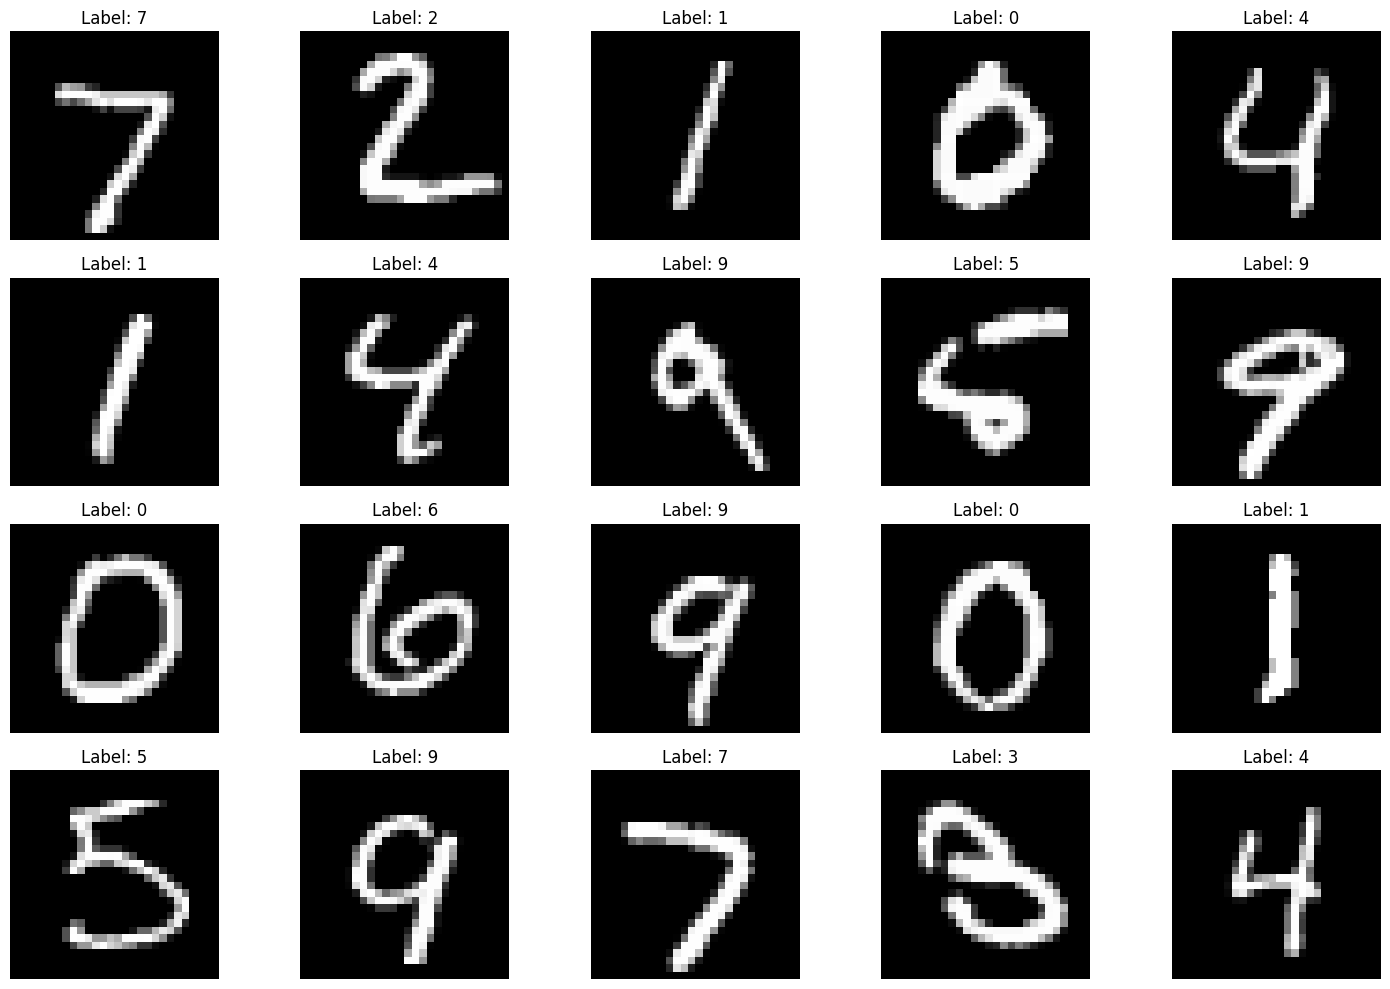

In [112]:
def plot_mnist_images(X, y, num_images=20):
    """
    Display multiple MNIST images in a grid without overlap.
    
    Args:
        X (numpy.ndarray): Image data.
        y (numpy.ndarray): Labels (one-hot encoded or class labels).
        num_images (int): Number of images to display.
    """
    # Calculate the grid dimensions (rows, columns)
    num_rows = 4  # 4 rows
    num_cols = 5  # 5 columns
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
    
    for i in range(num_images):
        # Find the row and column index
        row = i // num_cols
        col = i % num_cols
        
        # Get the image and label
        image = X[i].reshape(28, 28)  # Reshape the image to 28x28
        label = np.argmax(y[i]) if y.ndim > 1 else y[i]  # Get the label
        
        # Display the image
        axes[row, col].imshow(image, cmap='gray')
        axes[row, col].set_title(f"Label: {label}")
        axes[row, col].axis('off')  # Turn off axis

    plt.tight_layout()  # Adjust the spacing between subplots
    plt.show()

# Visualize the first 20 test images
plot_mnist_images(X_test, y_test, num_images=20)


## I created a small test file for predicting how the model performs, but as expected it is predicting some digits (4 and 7) wrong as my images wasn't scanned & processed properly also this is not a Neural Net model.

## But still it is performing quite well!

Directory selected: /home/kandarpa-sarkar/Desktop/MNIST_proj/notebook
Directory exists: True
Found 8 image(s).
Processing file: /home/kandarpa-sarkar/Desktop/MNIST_proj/notebook/sample_7(1).jpg


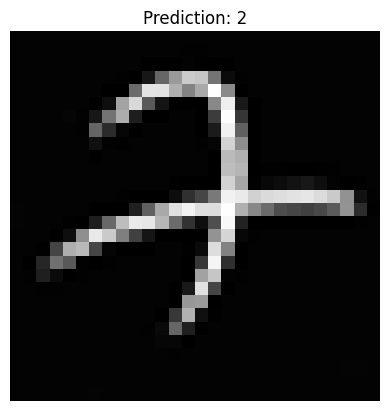

Processing file: /home/kandarpa-sarkar/Desktop/MNIST_proj/notebook/sample_1.jpg


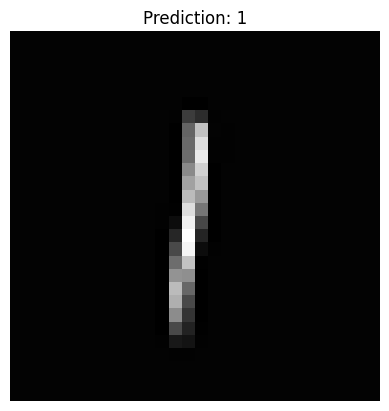

Processing file: /home/kandarpa-sarkar/Desktop/MNIST_proj/notebook/sample_6.jpg


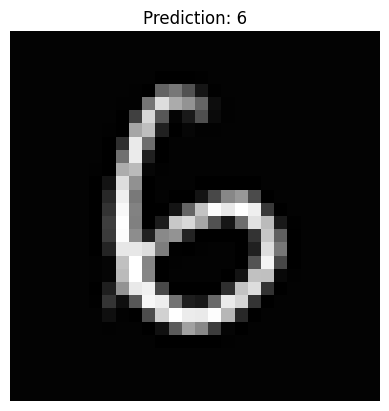

Processing file: /home/kandarpa-sarkar/Desktop/MNIST_proj/notebook/sample_5.jpg


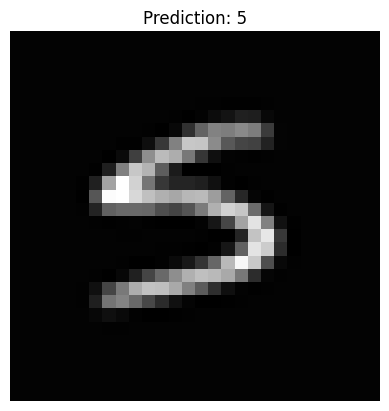

Processing file: /home/kandarpa-sarkar/Desktop/MNIST_proj/notebook/sample_2(1).jpg


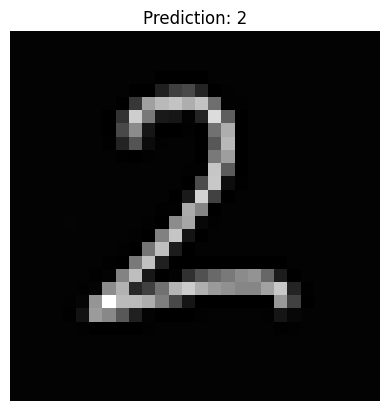

Processing file: /home/kandarpa-sarkar/Desktop/MNIST_proj/notebook/sample_5(1).jpg


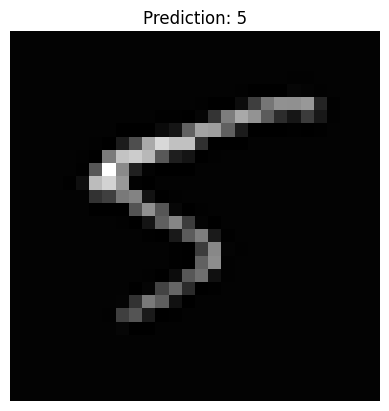

Processing file: /home/kandarpa-sarkar/Desktop/MNIST_proj/notebook/sample_4.jpg


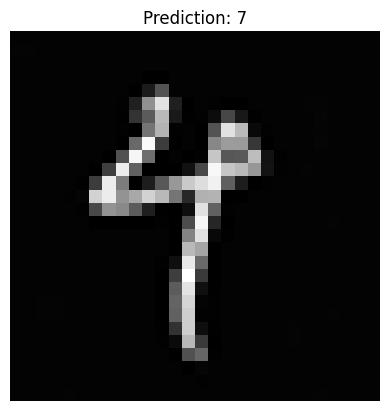

Processing file: /home/kandarpa-sarkar/Desktop/MNIST_proj/notebook/sample_3.jpg


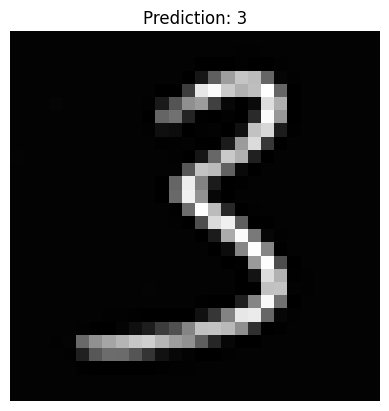

In [113]:
import os
from PIL import Image

def upload_and_predict(W, b):
    # Manually specify the directory path here
    directory_path = "/home/kandarpa-sarkar/Desktop/MNIST_proj/notebook"
    print(f"Directory selected: {directory_path}")

    if directory_path:
        # Check if directory exists and is accessible
        if os.path.exists(directory_path):
            print(f"Directory exists: {os.path.isdir(directory_path)}")
            if os.path.isdir(directory_path):
                # Get all image files
                image_files = [os.path.join(directory_path, f) for f in os.listdir(directory_path)
                               if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
                if not image_files:
                    print("No valid image files found.")
                    return
                else:
                    print(f"Found {len(image_files)} image(s).")
                    for file_path in image_files:
                        # Load and preprocess each image
                        print(f"Processing file: {file_path}")
                        img = Image.open(file_path).convert("L")  # Convert to grayscale
                        img_resized = img.resize((28, 28))       # Resize to 28x28
                        img_array = np.array(img_resized) / 255.0  # Normalize pixel values
                        img_inverted = 1 - img_array             # Invert the image
                        img_flattened = img_inverted.reshape(1, -1)  # Flatten the image

                        # Make prediction
                        y_pred = predict(img_flattened, W, b)

                        # Visualize the image and prediction
                        plt.imshow(img_inverted, cmap="gray")
                        plt.title(f"Prediction: {y_pred[0]}")
                        plt.axis("off")
                        plt.show()
            else:
                print("The selected path is not a directory.")
        else:
            print("The selected path doesn't exist or is inaccessible.")
    else:
        print("No directory selected.")


upload_and_predict(w, b)
